In [4]:
import tensorflow as tf

### Loading MNIST DATASET

In [8]:
mnist = tf.keras.datasets.mnist

### Splitting Dataset into train and test

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [14]:
x_train.shape

(60000, 28, 28)

In [16]:
x_test.shape

(10000, 28, 28)

### Visualization

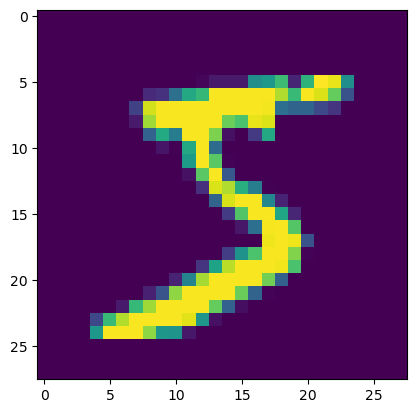

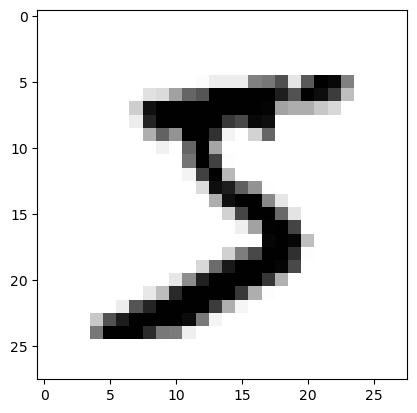

In [19]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.show()

plt.imshow(x_train[0], cmap= plt.cm.binary)

### Before Normalization

In [25]:
x_train[0]    

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Normalization

In [28]:
x_train = tf.keras.utils.normalize (x_train, axis= 1)
x_test =  tf.keras.utils.normalize (x_test, axis= 1)

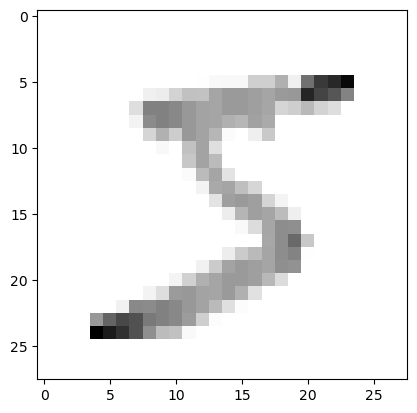

In [30]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

### After Normalization

In [33]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [35]:
y_train[0]

5

### RESIZING IMAGE

In [38]:
import numpy as np
IMG_SIZE = 28
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [40]:
x_train.shape

(60000, 28, 28, 1)

In [42]:
x_test.shape

(10000, 28, 28, 1)

### Creating DNN (Deep Neural Network)

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [64]:
model = Sequential()

In [66]:
# First Convolutional Layer
model.add(Conv2D(64, (3,3), input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third Convolutional Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully Connected Layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

# Fully Connected Layer 1
model.add(Dense(10))
model.add(Activation('softmax'))


In [68]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,306 (309.79 KB)

 Trainable params: 79,306 (309.79 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
len(x_train)

60000

In [74]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [78]:
model.fit(x_train, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7815 - loss: 0.6633 - val_accuracy: 0.9612 - val_loss: 0.1249
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9646 - loss: 0.1151 - val_accuracy: 0.9678 - val_loss: 0.1071
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9781 - loss: 0.0748 - val_accuracy: 0.9706 - val_loss: 0.0974
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9839 - loss: 0.0544 - val_accuracy: 0.9794 - val_loss: 0.0665
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9873 - loss: 0.0414 - val_accuracy: 0.9755 - val_loss: 0.0833


### Evaluating on testing dataset

In [83]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9704 - loss: 0.0990


In [88]:
print("Total loss on 10,000 test samples: ", test_loss)
print("Validation Accuracy on 10,000 test samples: ", test_acc)

Total loss on 10,000 test samples:  0.07829777896404266
Validation Accuracy on 10,000 test samples:  0.9764999747276306


## Total loss on 10,000 test samples: 0.07829777896404266
## Validation Accuracy on 10,000 test samples: 0.9764999747276306

## Prediction

In [102]:
# all predictions
predictions = model.predict([x_test])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


7


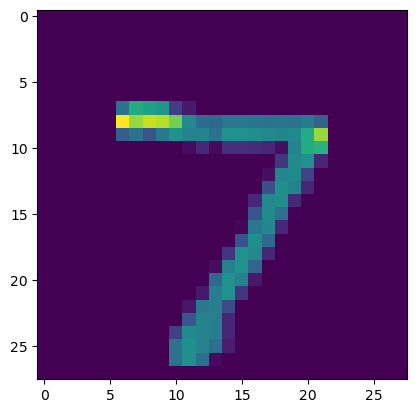

In [106]:
# orignal image and predicted value

plt.imshow(x_test[0])

print(np.argmax(predictions[0]))

4


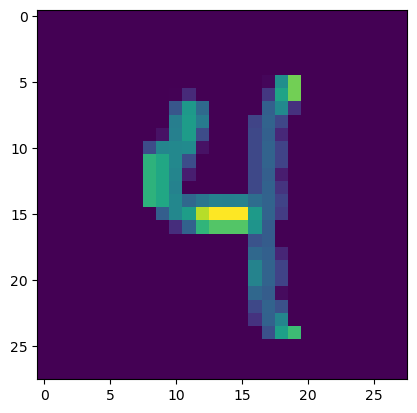

In [108]:
# orignal image and predicted value

plt.imshow(x_test[170])

print(np.argmax(predictions[170]))

9


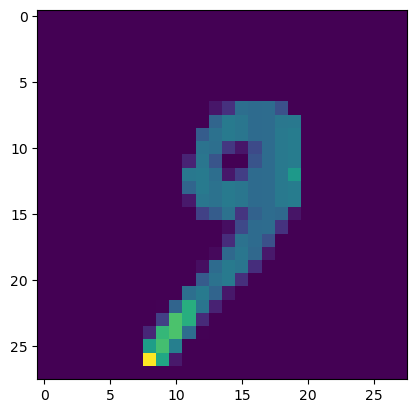

In [110]:
# orignal image and predicted value

plt.imshow(x_test[1000])

print(np.argmax(predictions[1000]))

0


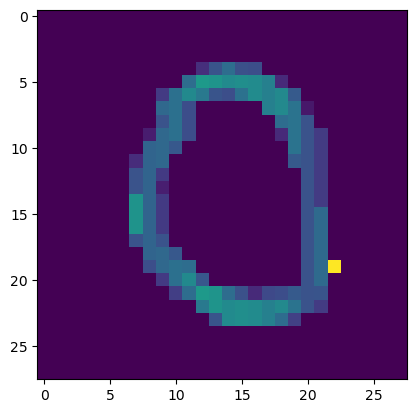

In [112]:
# orignal image and predicted value

plt.imshow(x_test[459])

print(np.argmax(predictions[459]))

#### Testing on images not from dataset

In [115]:
import cv2

In [297]:
# img = cv2.imread('one.png')
# img = cv2.imread('two.png')
# img = cv2.imread('three.png')  # 5
# img = cv2.imread('four.png')   # 0
# img = cv2.imread('five.png')
# img = cv2.imread('six.png')   # 8
# img = cv2.imread('seven.png')   # 1
# img = cv2.imread('eight.png')
# img = cv2.imread('nine.png')   # 2

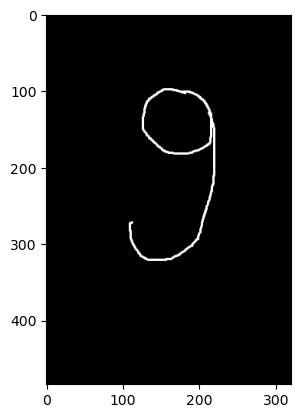

In [299]:
plt.imshow(img)

In [301]:
img.shape

(484, 321, 3)

In [303]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [305]:
resized = cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)

In [307]:
resized.shape

(28, 28)

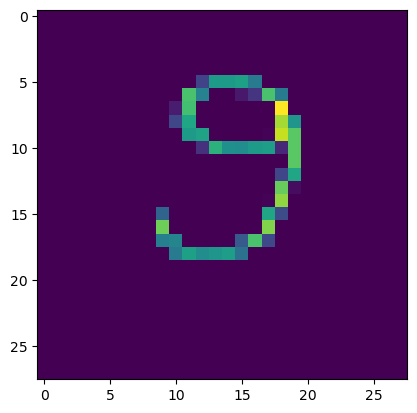

In [309]:
plt.imshow(resized)

In [311]:
newimg = tf.keras.utils.normalize(resized, axis=1)

newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [313]:
newimg.shape

(1, 28, 28, 1)

In [315]:
predictions = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [317]:
print(np.argmax(predictions))

2
